In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
! pwd
! ls

/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/Rai's
RNS_input.txt          err_100.png            err_1_dfe_0.1_1e-6.png
err_0.1.png            err_100_v14.png        err_1_dfe_0.1_5e-7.png
err_0.1_v14.png        err_10_v14.png         err_1_v14.png
err_1.png              err_1_dfe_0.1.png      notebook-ver22.ipynb
err_10.png             err_1_dfe_0.1_0.png    out


In [3]:
mu = [-0.0500000000000000, -0.0372751426827093, -0.0277887252403267, -0.0207165739660756, -0.0154442650096474, -0.0115137436372836, -0.0085835287378376, -0.0063990451684807, -0.0047705064337644, -0.0035564261597470, -0.0026513258509018, -0.0019765709878144, -0.0014735393118657, -0.0010985277619675, -0.0008189555813651, -0.0006105337229237, -0.0004551546326917, -0.0003393190775256, -0.0002529633405947, -0.0001885848922832, -0.0001405905753532, -0.0001048106751227, -0.0000781366573974, -0.0000582511010648, -0.0000434263620723, -0.0000323744768487, -0.0000241352648763, -0.0000179929088390, -0.0000134137648850, -0.0000100000000000]
sigma = [0.0000100000000000, 0.0000134137648850, 0.0000179929088390, 0.0000241352648763, 0.0000323744768487, 0.0000434263620723, 0.0000582511010648, 0.0000781366573974, 0.0001048106751227, 0.0001405905753532, 0.0001885848922832, 0.0002529633405947, 0.0003393190775256, 0.0004551546326917, 0.0006105337229237, 0.0008189555813651, 0.0010985277619675, 0.0014735393118657, 0.0019765709878144, 0.0026513258509018, 0.0035564261597470, 0.0047705064337644, 0.0063990451684807, 0.0085835287378376, 0.0115137436372836, 0.0154442650096474, 0.0207165739660756, 0.0277887252403267, 0.0372751426827093, 0.0500000000000000]
alpha = [0, -2, -4]
beta = [0, 1000, 3000, 5000, 7000]

In [4]:
# taking every third mu and sigma
mu_sigma = ['{:.10f}'.format(i) + ' ' + '{:.10f}'.format(j) for i in mu for j in sigma]
mu_sigma_reduced = ['{:.10f}'.format(i) + ' ' + '{:.10f}'.format(j) for i in mu[::3] for j in sigma[::3]]

In [5]:
# taking alpha = 0 and alpha = -2
alpha_beta = ['{:.0f}'.format(i) + ' ' + '{:.0f}'.format(j) for i in alpha for j in beta]
alpha_beta_reduced = ['{:.0f}'.format(i) + ' ' + '{:.0f}'.format(j) for i in alpha[:-1] for j in beta]

In [6]:
rns_pd = pd.read_excel("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver21/Rai's/Expected polymorphisms.xlsx", sheet_name="Newest (redneck)")
rns_parsed = ['{:.10f}'.format(x[2]) + ' ' + '{:.10f}'.format(x[3]) + ' ' + '{:.1f}'.format(x[4]) + ' ' + '{:.0f}'.format(x[5]) + ' ' + '{:.12f}'.format(x[10]) + '\n' for x in rns_pd.values.tolist()[2:]]

In [7]:
# ALSO HAVE VER14 NUMBERS - check that this is the right file
# comment and rerun the cell above if need 1-1/2N

rns_pd = pd.read_excel("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver14/Rai's/Expected polymorphisms.xlsx", sheet_name="Last stint")
rns_parsed = ['{:.10f}'.format(x[0]) + ' ' + '{:.10f}'.format(x[1]) + ' ' + '{:.1f}'.format(x[2]) + ' ' + '{:.0f}'.format(x[3]) + ' ' + '{:.12f}'.format(x[4]) + '\n' for x in rns_pd.values.tolist()]

In [8]:
# also leaving alpha = -4
rns_parsed_filtered = [x for x in rns_parsed if (' '.join(x.split()[:2]) in mu_sigma_reduced) and ('-4.0' not in x)]
rns_parsed_split = [list(map(float, x.split())) for x in rns_parsed_filtered]

In [9]:
# mu and sigma are x100 and b is x0.01 for the rns – now Fedya does this inside the code
rns_input = [' ' + '{:.10f}'.format(x[0]) + # mu 
             ' ' + '{:.10f}'.format(x[1]) + # sigma
             ' ' + '{:.1f}'.format(x[2]) + 
             ' ' + '{:.0f}'.format(x[3]) + # beta
             ' /nfs/scistore08/kondrgrp/alyulina/sandpiper/dynamics/h=sigm/ver22/rai/rns/RNSv22' + 
             '_mu=' + '{:.10f}'.format(x[0]) + 
             '_sigma=' + '{:.10f}'.format(x[1]) + 
             '_alpha=' + '{:.1f}'.format(x[2]) + 
             '_beta=' + '{:.0f}'.format(x[3]) + 
             '.txt\n' for x in rns_parsed_split]

In [13]:
# with open("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/Rai's/RNS_input.txt", 'w+') as f:
#    f.writelines(rns_input)

In [14]:
# dictionary with Rai's output
rns_parsed_filtered_dict = dict(zip([' '.join(x.split()[:-1]) for x in rns_parsed_filtered], [float(x.split()[-1]) for x in rns_parsed_filtered]))

In [15]:
# concatenating all erors
err = []

for i in range(len(alpha_beta_reduced)):
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta_reduced[i].split()[0])) + '_beta=' + alpha_beta_reduced[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
        
    err.extend([abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines])

In [16]:
# reading dfe area calculations
dfe_area_0_4N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_5e-7-inf_alpha=0.csv", header=None)
dfe_area_0_4N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_0_4N.values.tolist() for item in sublist]
dfe_area_0_4N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_0_4N.values.tolist() for item in sublist]
dfe_area_0_4N_dict = dict(zip(dfe_area_0_4N_keys, dfe_area_0_4N_values))

dfe_area_2_4N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_5e-7-inf_alpha=-2.csv", header=None)
dfe_area_2_4N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_2_4N.values.tolist() for item in sublist]
dfe_area_2_4N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_2_4N.values.tolist() for item in sublist]
dfe_area_2_4N_dict = dict(zip(dfe_area_2_4N_keys, dfe_area_2_4N_values))

mu_sigma_area_0_4N = [[i, j, dfe_area_0_4N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' 0')] for i in mu for j in sigma]
mu_sigma_area_2_4N = [[i, j, dfe_area_2_4N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -2')] for i in mu for j in sigma]

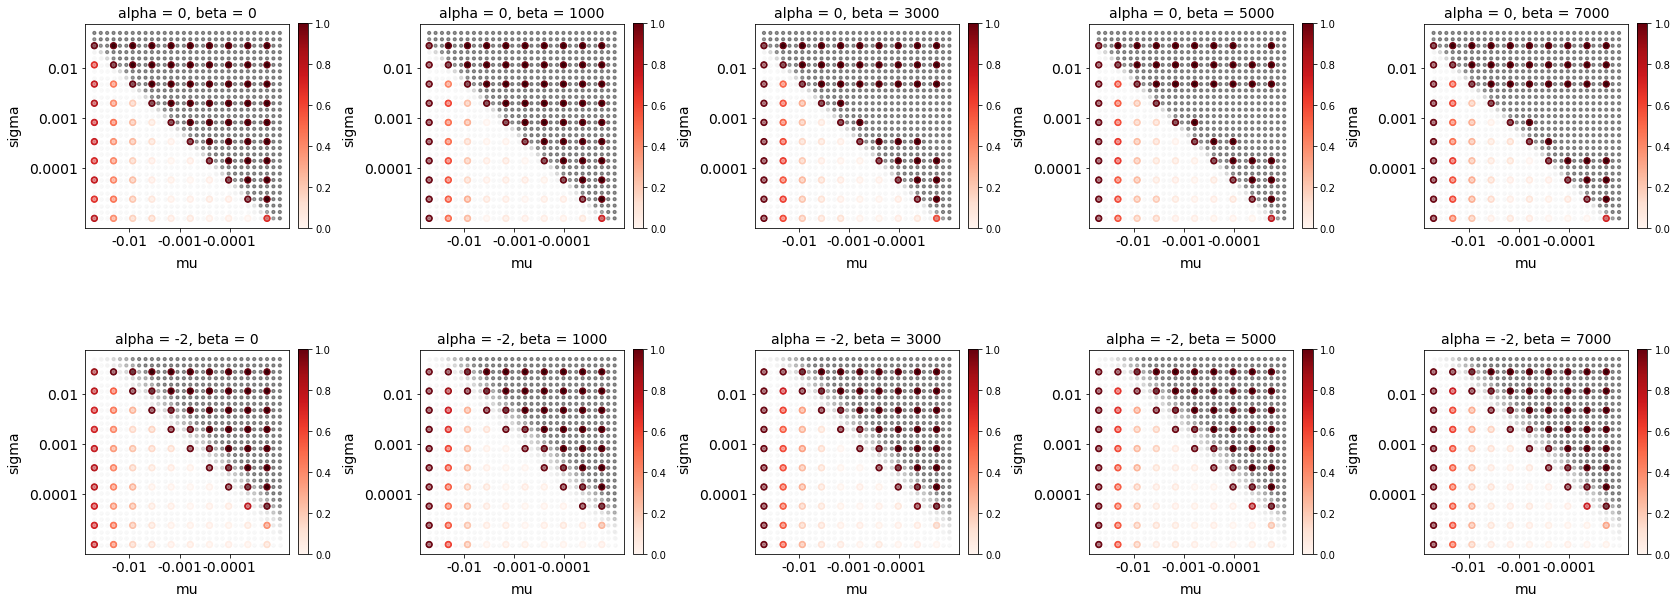

In [28]:
plt.figure(figsize=(28, 12))

plt.subplots_adjust(wspace=0.5, hspace=0)

for i in range(len(alpha_beta_reduced)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta_reduced[i].split()[0])) + '_beta=' + alpha_beta_reduced[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha) - 1, len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=1), s=40)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    if alpha_beta_reduced[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_0_4N], [np.log(float(x[1])) for x in mu_sigma_area_0_4N], c=[float(x[2]) for x in mu_sigma_area_0_4N], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    elif alpha_beta_reduced[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_2_4N], [np.log(float(x[1])) for x in mu_sigma_area_2_4N], c=[float(x[2]) for x in mu_sigma_area_2_4N], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta_reduced[i].split()[0] + ', beta = ' + alpha_beta_reduced[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

    
plt.savefig('err_1_dfe_0.1_5e-7.png', dpi=300, bbox_inches='tight')
#plt.savefig('err_1_dfe_0.01_5e-7.png', dpi=300, bbox_inches='tight')


In [18]:
# now with a different cut-off
# reading dfe area calculations
dfe_area_0_2N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_1e-6-inf_alpha=0.csv", header=None)
dfe_area_0_2N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_0_2N.values.tolist() for item in sublist]
dfe_area_0_2N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_0_2N.values.tolist() for item in sublist]
dfe_area_0_2N_dict = dict(zip(dfe_area_0_2N_keys, dfe_area_0_2N_values))

dfe_area_2_2N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_1e-6-inf_alpha=-2.csv", header=None)
dfe_area_2_2N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_2_2N.values.tolist() for item in sublist]
dfe_area_2_2N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_2_2N.values.tolist() for item in sublist]
dfe_area_2_2N_dict = dict(zip(dfe_area_2_2N_keys, dfe_area_2_2N_values))

dfe_area_4_2N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_1e-6-inf_alpha=-4.csv", header=None)
dfe_area_4_2N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_4_2N.values.tolist() for item in sublist]
dfe_area_4_2N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_4_2N.values.tolist() for item in sublist]
dfe_area_4_2N_dict = dict(zip(dfe_area_4_2N_keys, dfe_area_4_2N_values))


mu_sigma_area_0_2N = [[i, j, dfe_area_0_2N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' 0')] for i in mu for j in sigma]
mu_sigma_area_2_2N = [[i, j, dfe_area_2_2N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -2')] for i in mu for j in sigma]
mu_sigma_area_4_2N = [[i, j, dfe_area_4_2N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -4')] for i in mu for j in sigma]

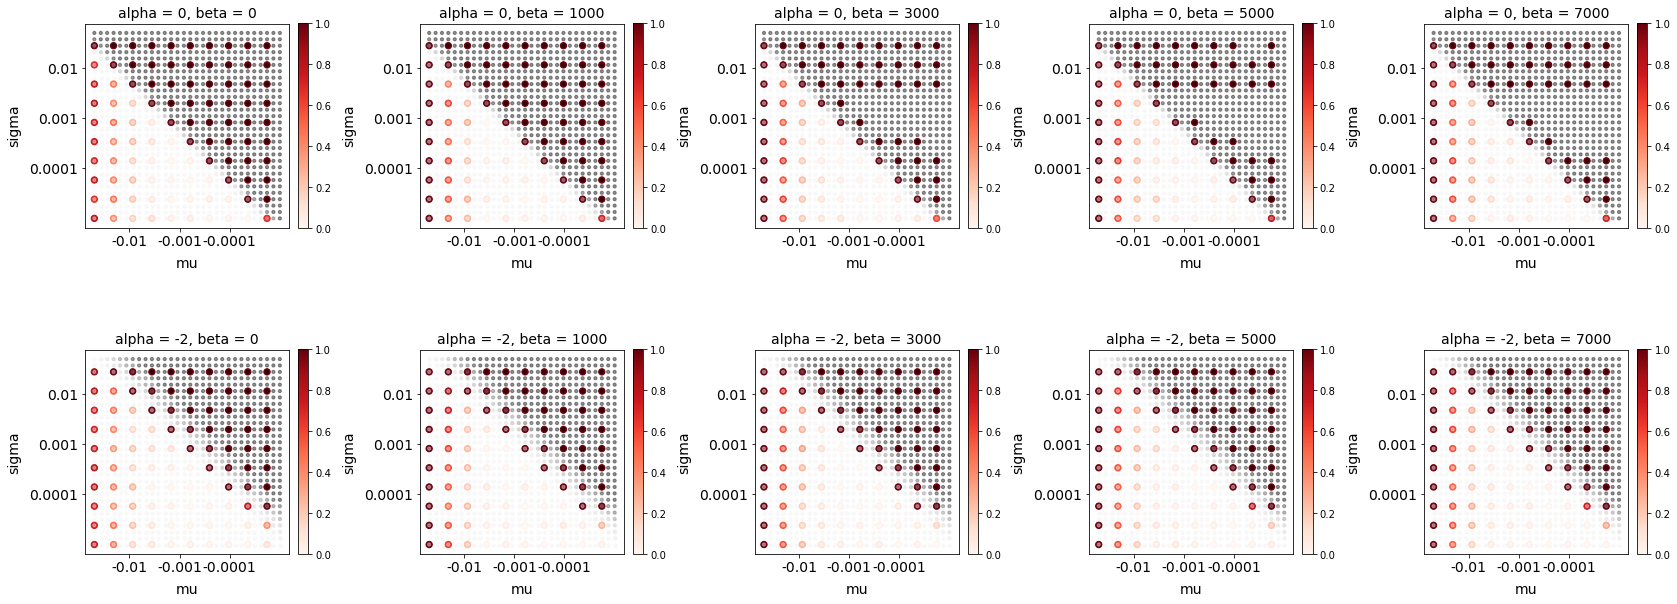

In [40]:
plt.figure(figsize=(28, 12))

plt.subplots_adjust(wspace=0.5, hspace=0)

for i in range(len(alpha_beta_reduced)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta_reduced[i].split()[0])) + '_beta=' + alpha_beta_reduced[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha) - 1, len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=1), s=40)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    if alpha_beta_reduced[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_0_2N], [np.log(float(x[1])) for x in mu_sigma_area_0_2N], c=[float(x[2]) for x in mu_sigma_area_0_2N], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    elif alpha_beta_reduced[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_2_2N], [np.log(float(x[1])) for x in mu_sigma_area_2_2N], c=[float(x[2]) for x in mu_sigma_area_2_2N], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta_reduced[i].split()[0] + ', beta = ' + alpha_beta_reduced[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

#plt.savefig('err_1_dfe_0.01_1e-6.png', dpi=300, bbox_inches='tight')
plt.savefig('err_1_dfe_0.1_1e-6.png', dpi=300, bbox_inches='tight')

In [20]:
# now with a different cut-off
# reading dfe area calculations
dfe_area_0_0 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=0.csv", header=None)
dfe_area_0_0_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_0_0.values.tolist() for item in sublist]
dfe_area_0_0_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_0_0.values.tolist() for item in sublist]
dfe_area_0_0_dict = dict(zip(dfe_area_0_0_keys, dfe_area_0_0_values))

dfe_area_2_0 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=-2.csv", header=None)
dfe_area_2_0_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_2_0.values.tolist() for item in sublist]
dfe_area_2_0_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_2_0.values.tolist() for item in sublist]
dfe_area_2_0_dict = dict(zip(dfe_area_2_0_keys, dfe_area_2_0_values))

dfe_area_4_0 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=-4.csv", header=None)
dfe_area_4_0_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_4_0.values.tolist() for item in sublist]
dfe_area_4_0_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_4_0.values.tolist() for item in sublist]
dfe_area_4_0_dict = dict(zip(dfe_area_4_0_keys, dfe_area_4_0_values))


mu_sigma_area_0_0 = [[i, j, dfe_area_0_0_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' 0')] for i in mu for j in sigma]
mu_sigma_area_2_0 = [[i, j, dfe_area_2_0_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -2')] for i in mu for j in sigma]
mu_sigma_area_4_0 = [[i, j, dfe_area_4_0_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -4')] for i in mu for j in sigma]

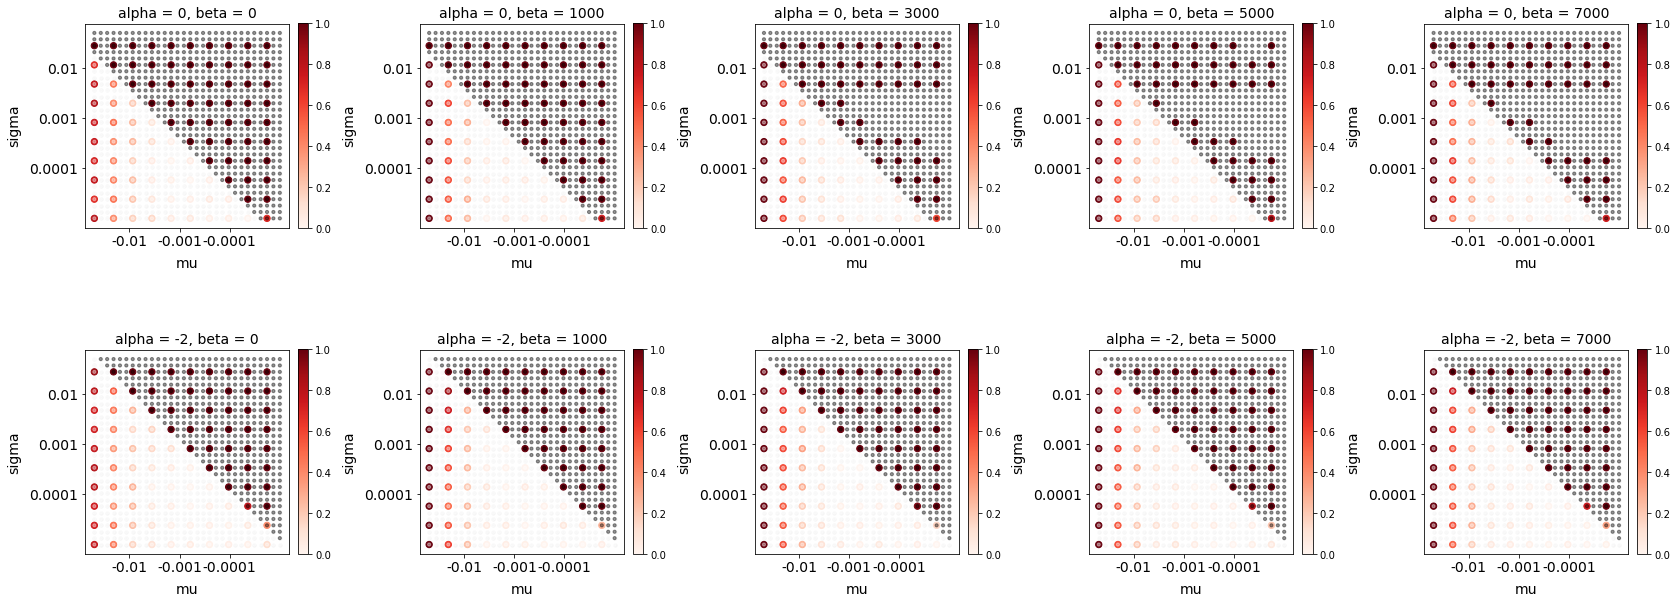

In [24]:
plt.figure(figsize=(28, 12))

plt.subplots_adjust(wspace=0.5, hspace=0)

for i in range(len(alpha_beta_reduced)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta_reduced[i].split()[0])) + '_beta=' + alpha_beta_reduced[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha) - 1, len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=1), s=40)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    if alpha_beta_reduced[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_0_0], [np.log(float(x[1])) for x in mu_sigma_area_0_0], c=[float(x[2]) for x in mu_sigma_area_0_0], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.01), s=10, alpha=0.4)
    elif alpha_beta_reduced[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_2_0], [np.log(float(x[1])) for x in mu_sigma_area_2_0], c=[float(x[2]) for x in mu_sigma_area_2_0], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.01), s=10, alpha=0.4)
    
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta_reduced[i].split()[0] + ', beta = ' + alpha_beta_reduced[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

    
plt.savefig('err_1_dfe_0.01_0.png', dpi=300, bbox_inches='tight')
#plt.savefig('err_1_dfe_0.1_0.png', dpi=300, bbox_inches='tight')



In [29]:
dfe_area_0_2N_keys == dfe_area_0_0_keys
dfe_area_0_0_2N_dict = dict(zip(dfe_area_0_0_keys, zip(dfe_area_0_0_values, dfe_area_0_2N_values)))

In [30]:
to_run = []
for alpha_area in [(mu_sigma_area_0_0, 0), (mu_sigma_area_2_0, 2), (mu_sigma_area_4_0, 4)]: 
    for i in range(len(alpha_area[0])):
        if alpha_area[0][i][0] > -0.015 and alpha_area[0][i][1] < 0.015:
            if alpha_area[0][i][-1] == 0.0 and alpha_area[0][i+1][-1] > 0.0 and alpha_area[0][i][0] == alpha_area[0][i][0]:
                mu_i = alpha_area[0][i][0]
                for j in range(-2, 27):
                    if alpha_area[0][i + j][0] == mu_i and alpha_area[0][i + j][-1] <= 0.05: # checking that we are in the same column and requiring less than 5% to be positive
                        to_run.append([alpha_area[0][i + j][0], alpha_area[0][i + j][1], alpha_area[1], alpha_area[0][i + j][2]])
        

In [31]:
len(to_run)

446

[[-0.0115137436372836, 0.0019765709878144, 0, 0.0],
 [-0.0115137436372836, 0.0026513258509018, 0, 0.0],
 [-0.0115137436372836, 0.003556426159747, 0, 0.0],
 [-0.0115137436372836, 0.0047705064337644, 0, 0.01],
 [-0.0115137436372836, 0.0063990451684807, 0, 0.04],
 [-0.0085835287378376, 0.0014735393118657, 0, 0.0],
 [-0.0085835287378376, 0.0019765709878144, 0, 0.0],
 [-0.0085835287378376, 0.0026513258509018, 0, 0.0],
 [-0.0085835287378376, 0.003556426159747, 0, 0.01],
 [-0.0085835287378376, 0.0047705064337644, 0, 0.04],
 [-0.0063990451684807, 0.0010985277619675, 0, 0.0],
 [-0.0063990451684807, 0.0014735393118657, 0, 0.0],
 [-0.0063990451684807, 0.0019765709878144, 0, 0.0],
 [-0.0063990451684807, 0.0026513258509018, 0, 0.01],
 [-0.0063990451684807, 0.003556426159747, 0, 0.04],
 [-0.0047705064337644, 0.0008189555813651, 0, 0.0],
 [-0.0047705064337644, 0.0010985277619675, 0, 0.0],
 [-0.0047705064337644, 0.0014735393118657, 0, 0.0],
 [-0.0047705064337644, 0.0019765709878144, 0, 0.01],
 [-0.004

In [ ]:
-0.0006105337, 0.0001405906, 0.0, 0, 8.508664664e-05, 0.005252229189481146
-0.0006105337, 0.0003393191, 0.0, 0, 0.0065094284, 17.272006118375355

In [ ]:
-0.0006105337, 0.0001405906, 0.0, 1000, 0.0017981001479999996, 14.156634102707143
-0.0006105337, 0.0003393191, 0.0, 1000, 0.026406388, 65.31802955820412